# Viral Text Classification using Machine Learning
Main goals: try three machine learning models, for binary classification & for continuous (retweet) prediction.

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [85]:
data = pd.read_csv('data/tweet_virality.csv', index_col=0)

In [86]:
data

,creation_time,user,tweet,retweets,favorites,followers,lists,viral,virality,confidence,...,89,90,91,92,93,94,95,96,97,98
0,2022-09-23 07:30:12+00:00,goannaburrows,"The VC is ""pleased to advise"" that next year t...",0,7,566,7,0,0.000000,0.503691,...,0,0,0,0,0,0,0,0,0,0
1,2022-09-16 00:18:55+00:00,goannaburrows,Reminder: Feedback on the proposal for a natio...,1,1,566,7,0,0.000112,0.277627,...,0,0,0,0,0,0,0,0,0,0
2,2022-09-15 07:47:58+00:00,goannaburrows,Yesterday I had an embarrassing moment that I ...,0,5,566,7,0,0.000000,0.547355,...,0,0,0,0,0,0,0,0,0,0
3,2022-09-14 07:28:49+00:00,goannaburrows,Today a news editor told me that 'biodiversity...,0,8,566,7,0,0.000000,0.272664,...,0,0,0,0,0,0,0,0,0,0
4,2022-09-13 03:40:24+00:00,goannaburrows,Writing productivity tip: type in a heinous fo...,0,8,566,7,0,0.000000,0.412515,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17874,2021-12-08 09:25:46+00:00,Sys_innovation,Very interesting this idea by Adrian Bejan htt...,10,22,15528,373,1,0.000041,0.597716,...,0,0,0,0,0,0,0,0,0,0
17875,2021-12-06 10:33:15+00:00,Sys_innovation,The iceberg model can be applied to any situat...,9,30,15528,373,1,0.000037,0.403950,...,0,0,0,0,0,0,0,0,0,0
17876,2021-12-04 11:33:49+00:00,Sys_innovation,The iceberg model for thinking about the diffe...,8,22,15528,373,1,0.000033,0.482952,...,0,0,0,0,0,0,0,0,0,0
17877,2020-06-16 20:54:09+00:00,WasAlmostSlater,I will not be tricked into getting excited for...,6,97,419,9,1,0.000907,0.403792,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Assigning X and Y Values
X = data.drop(['virality', 'retweets', 'favorites', 'viral', 'creation_time', 'user', 'tweet', 'followers', 'lists'], axis=1) # Troubleshooting []
y = data['viral']

In [96]:
# Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

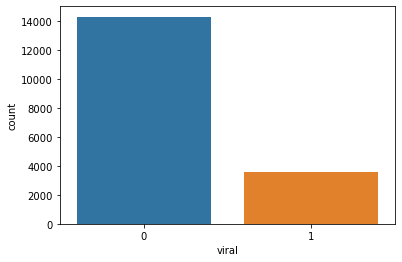

The class imbalance in the dataset is considerable, with a target constituting only 19.9% of the data.


In [97]:
# Illustrating the Class Imbalance
plt.show(sns.countplot(x=data['viral']))
class_imbalance = round(sum(data['viral']) / len(data['viral']), 3) * 100
print(f'The class imbalance in the dataset is considerable, with a target constituting only {round(class_imbalance, 3)}% of the data.')

Class Imbalance addresssed with SMOTENC:


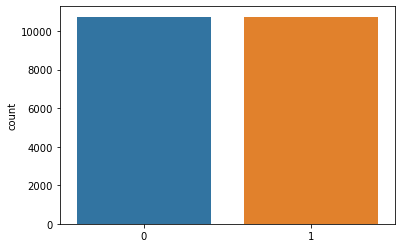

In [109]:
# Balancing class-imbalanced data with SMOTENC
sm = SMOTENC(categorical_features=[98], random_state=42)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train.ravel())
print('Class Imbalance addresssed with SMOTENC:')
sns.countplot(x=y_train_SMOTE);

In [110]:
log_reg=LogisticRegression()
log_reg.fit(X_train_SMOTE,y_train_SMOTE)

print('Training Accuracy: {:.4}%'.format(log_reg.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(log_reg.score(X_test, y_test) * 100))

Training Accuracy: 65.07%
Validation accuracy: 62.04%


In [111]:
# Instantiate and Fit an XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_SMOTE, y_train_SMOTE)

# Accuracy of training and test sets
print('Training Accuracy: {:.4}%'.format(XGB.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(XGB.score(X_test, y_test) * 100))

Training Accuracy: 73.74%
Validation accuracy: 63.91%


In [112]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_SMOTE, y_train_SMOTE)

# Training and Testing accuracy score
print('Training Accuracy: {:.4}%'.format(forest.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(forest.score(X_test, y_test) * 100))

Training Accuracy: 99.91%
Validation accuracy: 62.01%


In [113]:
# Comparing all three models
print('LogReg Validation set Accuracy:  {:.4}%'.format(log_reg.score(X_test, y_test) * 100))
print('XGBoost Validation set Accuracy: {:.4}%'.format(XGB.score(X_test, y_test) * 100))
print('Forest Validation set Accuracy:  {:.4}%'.format(forest.score(X_test, y_test) * 100))

log_pred=log_reg.predict(X_test)
XGB_pred=XGB.predict(X_test)
RF_pred=forest.predict(X_test)

print('\nLogistic Regression Report:')
print(classification_report(y_test, log_pred))
print('\nXGBoost Report:')
print(classification_report(y_test, XGB_pred))
print('\nRF Report:')
print(classification_report(y_test, RF_pred))

LogReg Validation set Accuracy:  62.04%
XGBoost Validation set Accuracy: 63.91%
Forest Validation set Accuracy:  62.01%

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      3582
           1       0.30      0.68      0.42       888

    accuracy                           0.62      4470
   macro avg       0.59      0.64      0.57      4470
weighted avg       0.77      0.62      0.66      4470


XGBoost Report:
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      3582
           1       0.30      0.59      0.39       888

    accuracy                           0.64      4470
   macro avg       0.58      0.62      0.57      4470
weighted avg       0.75      0.64      0.67      4470


RF Report:
              precision    recall  f1-score   support

           0       0.83      0.66      0.73      3582
           1       0.26      0.48      0.33       888

    

In [114]:
print('Baseline Models with Default Parameters:\n')
print('Logistic Regression F1:')
print(f1_score(y_test, log_pred))
print('\nXGB F1:')
print(f1_score(y_test, XGB_pred))
print('\nRF F1:')
print(f1_score(y_test, RF_pred))

Baseline Models with Default Parameters:

Logistic Regression F1:
0.4150293002412961

XGB F1:
0.3933809702895825

RF F1:
0.3320220298977183


In [115]:
coef = log_reg.coef_[0]
logreg_coef = pd.DataFrame(coef, 
             X_train_SMOTE.columns, 
             columns=['coef']).sort_values(by='coef', ascending=False)
logreg_coef

,coef
70,2.218814
66,1.731091
41,1.679886
21,1.289511
42,1.269563
...,...
96,-2.086772
33,-2.176576
89,-2.454484
50,-2.695218


# Hyperparameter Tuning

In [116]:
measure = ['accuracy','f1']
optimize = 'f1'

### Logistic Regression Hyperparameter Tuning

In [117]:
# Our hyperparameter grid, with some other options as comments
logreg_params = {
    "C" : [0.01, 0.1, 1],
    'class_weight': ['balanced'],
    "penalty" : ["l1","l2"],
    'solver':['liblinear']
}

# Searching Parameters
rand_logreg = RandomizedSearchCV(log_reg, logreg_params, scoring=measure, refit=optimize, cv=3, n_jobs=1, n_iter=6, random_state=42)
rand_logreg.fit(X_train_SMOTE, y_train_SMOTE)

logreg_best_params = rand_logreg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(logreg_best_params.keys()):
    print('%s: %r' % (param_name, logreg_best_params[param_name]))

Grid Search found the following optimal parameters: 
C: 1
class_weight: 'balanced'
penalty: 'l2'
solver: 'liblinear'


In [118]:
# Comparison to Baseline
Rlogreg_pred=rand_logreg.predict(X_test)
print('Baseline Logistic Regression F1: ' + str(f1_score(y_test, log_pred)))
print('Tuned Logistic Regression F1: ' + str(f1_score(y_test, Rlogreg_pred)))

Baseline Logistic Regression F1: 0.4150293002412961
Tuned Logistic Regression F1: 0.4150293002412961


## XGBoost Hyperparameter Tuning

In [143]:
# Our hyperparameter grid, with some other options as comments

XGB_params = {
    'learning_rate' : [0.2, 0.25, 0.3, 0.35],
    'min_child_weight' : [1, 3, 5, 7],
#     'gamma' : [0.0, 0.1, 0.2 , 0.3, 0.4],
#     'colsample_bytree' : [0.3, 0.4, 0.5 , 0.7],
    'alpha' : [0.01], # L1 regularization
#     'eta': [1, 0.1, 0.01,],
    'eval_metric':['mlogloss'],
    'lambda':[1], # L2 regularization
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'max_depth': [5, 7],
    'n_estimators': [30, 60, 120],
#     'scale_pos_weight' : [.9, 1, 1.1] # apparently deals with imbalanced data - not needed since training data is balanced 
#     'subsample': [0.5]
}

# Searching Parameters
rand_XGB = GridSearchCV(XGB, XGB_params, scoring=measure, refit=optimize, cv=3, n_jobs=1)
rand_XGB.fit(X_train_SMOTE, y_train_SMOTE)

XGB_best_parameters = rand_XGB.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(XGB_best_parameters.keys()):
    print('%s: %r' % (param_name, XGB_best_parameters[param_name]))

[16:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

[16:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

Grid Search found the following optimal parameters: 
alpha: 0.01
booster: 'gbtree'
eval_metric: 'mlogloss'
lambda: 1
learning_rate: 0.25
max_depth: 7
min_child_weight: 1
n_estimators: 120


In [144]:
# Comparison to Baseline
RXGB_pred=rand_XGB.predict(X_test)
print('Baseline XGBoost F1: ' + str(f1_score(y_test, XGB_pred)))
print('Tuned XGB F1: ' + str(f1_score(y_test, RXGB_pred)))

Baseline XGBoost F1: 0.3933809702895825
Tuned XGB F1: 0.3802505526897568


## Random Forest Hyperparameter Tuning

In [132]:
# Our hyperparameter grid, with some other options as comments
rf_params = {
    'bootstrap' : [False],
    'class_weight' : ['balanced'], # 'balanced_subsample',
    'criterion' : ['entropy'], # 'gini', 
    'max_features' : ['auto'],
    'max_depth' : [50, 60],
    'n_estimators' : [100, 120]
}

# Searching parameters
rand_rf = RandomizedSearchCV(forest, rf_params, scoring=measure, refit=optimize, cv=2, n_jobs=1, n_iter=5, random_state=42)
rand_rf.fit(X_train_SMOTE, y_train_SMOTE)

rf_best_params = rand_rf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(rf_best_params.keys()):
    print('%s: %r' % (param_name, rf_best_params[param_name]))

C:\Users\8D\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\8D\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\8D\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\8D\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py

Grid Search found the following optimal parameters: 
bootstrap: False
class_weight: 'balanced'
criterion: 'entropy'
max_depth: 60
max_features: 'auto'
n_estimators: 100


In [133]:
# Comparison to Baseline
RRF_pred=rand_rf.predict(X_test)
print('Baseline Random Forest F1: ' + str(f1_score(y_test, RF_pred)))
print('Tuned Random Forest F1: ' + str(f1_score(y_test, RRF_pred)))

Baseline Random Forest F1: 0.3320220298977183
Tuned Random Forest F1: 0.3368779242875372


# Tuned Model Classification Reports

In [134]:
print('\nTuned Logistic Regression Report:')
print(classification_report(y_test, Rlogreg_pred))
print('\nTuned XGBoost Report:')
print(classification_report(y_test, RXGB_pred))
print('\nTuned RF Report:')
print(classification_report(y_test, RRF_pred))


Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      3582
           1       0.30      0.68      0.42       888

    accuracy                           0.62      4470
   macro avg       0.59      0.64      0.57      4470
weighted avg       0.77      0.62      0.66      4470


Tuned XGBoost Report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      3582
           1       0.30      0.60      0.40       888

    accuracy                           0.64      4470
   macro avg       0.58      0.62      0.57      4470
weighted avg       0.75      0.64      0.67      4470


Tuned RF Report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.76      3582
           1       0.27      0.45      0.34       888

    accuracy                           0.65      4470
   macro avg       0.55      0.57      0.55      447

In [135]:
# Accuracy Scores
print('Tuned Accuracy Scores compared to Baseline:\n')
print('LogReg Validation Accuracy:         {:.4}%'.format(log_reg.score(X_test, y_test) * 100))
print('Tuned LogReg Validation Accuracy:   {:.4}%'.format(rand_logreg.best_score_*100))
print()
print('XGBoost Validation Accuracy:        {:.4}%'.format(XGB.score(X_test, y_test) * 100))
print('Tuned XGBoost Validation Accuracy:  {:.4}%'.format(rand_XGB.best_score_*100))
print()
print('Forest Validation Accuracy:         {:.4}%'.format(forest.score(X_test, y_test) * 100))
print('Tuned Forest Validation Accuracy:   {:.4}%'.format(rand_rf.best_score_*100))

Tuned Accuracy Scores compared to Baseline:

LogReg Validation Accuracy:         62.04%
Tuned LogReg Validation Accuracy:   65.23%

XGBoost Validation Accuracy:        63.91%
Tuned XGBoost Validation Accuracy:  67.86%

Forest Validation Accuracy:         62.01%
Tuned Forest Validation Accuracy:   64.57%


Logreg AUC: 64.2% -- False Positive Rate: 39.39% -- True Positive Rate: 67.79%
XGB AUC:    62.28% -- False Positive Rate: 35.23% -- True Positive Rate: 59.8%
RF AUC:     57.4% -- False Positive Rate: 29.79% -- True Positive Rate: 44.59%


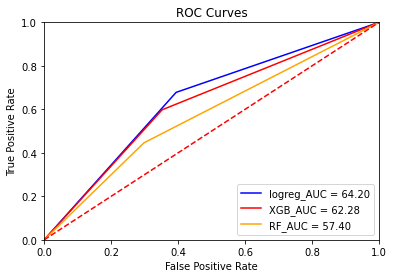

In [136]:
# ROC Curves for Tuned Sets
logreg_fp, logreg_tp, thresholds=roc_curve(y_test, Rlogreg_pred, pos_label=1)
logreg_AUC=auc(logreg_fp, logreg_tp)*100
print(f'Logreg AUC: {round(logreg_AUC, 2)}% -- False Positive Rate: {round(logreg_fp[1] * 100, 2)}% -- True Positive Rate: {round(logreg_tp[1] * 100, 2)}%')
plt.plot(logreg_fp, logreg_tp, color='blue',label = 'logreg_AUC = %0.2f' % logreg_AUC)

XGB_fp, XGB_tp, thresholds=roc_curve(y_test, RXGB_pred, pos_label=1)
XGB_AUC=auc(XGB_fp, XGB_tp)*100
print(f'XGB AUC:    {round(XGB_AUC, 2)}% -- False Positive Rate: {round(XGB_fp[1] * 100, 2)}% -- True Positive Rate: {round(XGB_tp[1] * 100, 2)}%')
plt.plot(XGB_fp, XGB_tp, color='red',label = 'XGB_AUC = %0.2f' % XGB_AUC)

RF_fp, RF_tp, thresholds=roc_curve(y_test, RRF_pred, pos_label=1)
RF_AUC=auc(RF_fp, RF_tp)*100
print(f'RF AUC:     {round(RF_AUC, 2)}% -- False Positive Rate: {round(RF_fp[1] * 100, 2)}% -- True Positive Rate: {round(RF_tp[1] * 100, 2)}%')
plt.plot(RF_fp, RF_tp, color='orange',label = 'RF_AUC = %0.2f' % RF_AUC)

plt.title('ROC Curves')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

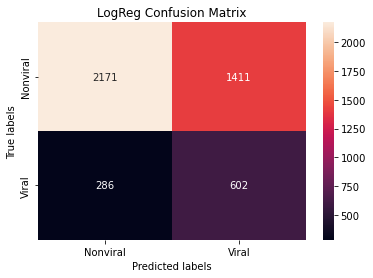

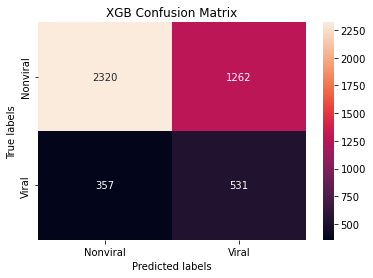

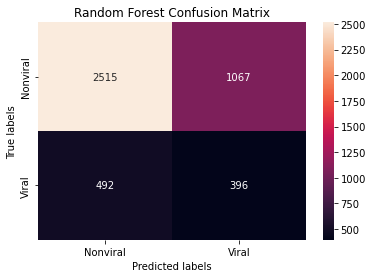

In [137]:
# Tuned Confusion Matrices
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, Rlogreg_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); ax.set_title('LogReg Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Nonviral', 'Viral']); ax.yaxis.set_ticklabels(['Nonviral', 'Viral']);
plt.show(ax)

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, RXGB_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); ax.set_title('XGB Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Nonviral', 'Viral']); ax.yaxis.set_ticklabels(['Nonviral', 'Viral']);
plt.show(ax)

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, RRF_pred), annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); ax.set_title('Random Forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Nonviral', 'Viral']); ax.yaxis.set_ticklabels(['Nonviral', 'Viral']);
plt.show(ax)

In [138]:
print('\nTuned Logistic Regression Report:')
print(classification_report(y_test, Rlogreg_pred))
print('\nTuned XGBoost Report:')
print(classification_report(y_test, RXGB_pred))


Tuned Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.88      0.61      0.72      3582
           1       0.30      0.68      0.42       888

    accuracy                           0.62      4470
   macro avg       0.59      0.64      0.57      4470
weighted avg       0.77      0.62      0.66      4470


Tuned XGBoost Report:
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      3582
           1       0.30      0.60      0.40       888

    accuracy                           0.64      4470
   macro avg       0.58      0.62      0.57      4470
weighted avg       0.75      0.64      0.67      4470



In [139]:
Rlogreg_pred.

SyntaxError: invalid syntax (Temp/ipykernel_8064/644020699.py, line 1)

In [93]:
X_train_SMOTE

,followers,lists,confidence,0,1,2,3,4,5,6,...,89,90,91,92,93,94,95,96,97,98
0,200,2,0.400962,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,279,7,0.416909,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1489,54,0.238860,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3487,84,0.624367,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,991,45,0.379968,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21487,7500,409,0.410173,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21488,1809,32,0.405538,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21489,8621,137,0.456821,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21490,140062,3305,0.710264,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
X_train

,followers,lists,confidence,0,1,2,3,4,5,6,...,89,90,91,92,93,94,95,96,97,98
6698,200,2,0.400962,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3643,279,7,0.416909,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6182,1489,54,0.238860,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2655,3487,84,0.624367,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,991,45,0.379968,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,553,4,0.407077,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9090,1809,32,0.679152,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13668,3363,22,0.319774,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4314,900,7,0.257913,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
import statsmodels.api as sm

### OLS multi-linear regression

X_train_1 = sm.add_constant(X_train) # Adding constant
model = sm.OLS(y_train, X_train_1) # defining model parameters
results = model.fit() # Fitting model

results.summary()

C:\Users\8D\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  viral   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     13.31
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          1.23e-200
Time:                        12:14:26   Log-Likelihood:                -6071.7
No. Observations:               13409   AIC:                         1.234e+04
Df Residuals:                   13309   BIC:                         1.309e+04
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1226      0.013      9.648      0.000       0.098       0.148
confidence     0.1656      0.029      5.650      0.000       0.108       0.223
0              0.0928      0.012      7.633      0.000       0.069       0.117
1             -0.1226      0.017     -7.340      0.000      -0.155      -0.090
2              0.0342      0.019      1.774      0.076      -0.004       0.072
3             -0.0537      0.020     -2.632      0.009      -0.094      -0.014
4             -0.0428      0.020     -2.115      0.034      -0.082      -0.003
5              0.0586      0.021      2.780      0.005       0.017       0.100
6             -0.0529      0.022     -2.419      0.016      -0.096      -0.010
7              0.1913      0.022      8.790      0.000       0.149       0.234
8              0.0474      0.025      1.891      0.059      -0.002       0.096
9             -0.1226      0.025     -4.979      0.000      -0.171      -0.074
10             0.1007      0.025      4.038      0.000       0.052       0.150
11            -0.0492      0.025     -1.951      0.051      -0.099       0.000
12            -0.1262      0.025     -5.058      0.000      -0.175      -0.077
13             0.1633      0.026      6.376      0.000       0.113       0.214
14            -0.1102      0.025     -4.369      0.000      -0.160      -0.061
15            -0.0374      0.026     -1.444      0.149      -0.088       0.013
16            -0.0731      0.026     -2.784      0.005      -0.125      -0.022
17            -0.0601      0.025     -2.366      0.018      -0.110      -0.010
18             0.1641      0.025      6.486      0.000       0.114       0.214
19            -0.0651      0.027     -2.391      0.017      -0.118      -0.012
20            -0.0668      0.027     -2.497      0.013      -0.119      -0.014
21             0.2584      0.027      9.656      0.000       0.206       0.311
22            -0.0957      0.028     -3.423      0.001      -0.150      -0.041
23            -0.0982      0.030     -3.300      0.001      -0.157      -0.040
24             0.2065      0.029      7.204      0.000       0.150       0.263
25             0.0476      0.029      1.654      0.098      -0.009       0.104
26             0.0229      0.030      0.771      0.441      -0.035       0.081
27            -0.0858      0.031     -2.789      0.005      -0.146      -0.025
28            -0.0767      0.031     -2.453      0.014      -0.138      -0.015
29            -0.0728      0.031     -2.325      0.020      -0.134      -0.011
30             0.0481      0.032      1.492      0.136      -0.015       0.111
31            -0.0592      0.032     -1.880      0.060      -0.121       0.003
32            -0.0017      0.031     -0.054      0.957      -0.062       0.059
33            -0.1540      0.032     -4.825      0.000      -0.216      -0.091
34